In [1]:
import myComponents as tc
import topic as tp
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

In [6]:
# network parameter
num_broker = 10
num_sub = 6
num_pub = 2
broker_r = 500
broker_rates = [broker_r]*num_broker
topic_dist = [3,2,2]
monitor_rate = 1
runtime = 100
connection_style = None

# sub parameter
avg_sub_size = 10.0
sub_r = 3

sub_rates = [sub_r]*num_sub
sub_num_topic = [np.prod(topic_dist)//num_sub*2]*num_sub
sub_diameter = [len(topic_dist)]*num_sub

# pub parameter
avg_pub_size = 20.0
pub_r = 3

pub_rates = [pub_r]*num_pub
pub_num_topic = [np.prod(topic_dist)//num_pub*2]*num_pub
pub_diameter = [len(topic_dist)]*num_pub


seed = 1

## parameter to consider
### sub_rate/pub_rate, sub_size/pub_size, sub_num/pub_num, sub_topic_diameter/pub_topic_diameter, network_diameter(longest_path), 

In [7]:
# run simluattion
mode = 'PF'
tc.SwitchPort.mode = mode
total_topic = tp.TopicTree()
total_topic.random_construct(topic_dist, seed)
#total_topic.visualize(total_topic.root)
net = tc.Network(total_topic, avg_sub_size, avg_pub_size)
net.initialize_nodes(broker_rates, sub_rates, sub_num_topic, sub_diameter, pub_rates, pub_num_topic, pub_diameter, monitor_rate, seed)
net.establish_topology(seed)
net.connect_client(connection_style, seed)
net.env.run(runtime)
print(tc.SwitchPort.mode)

PF


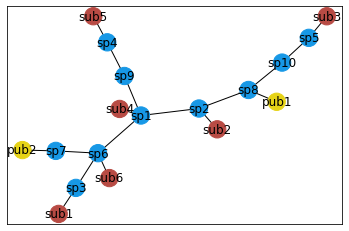

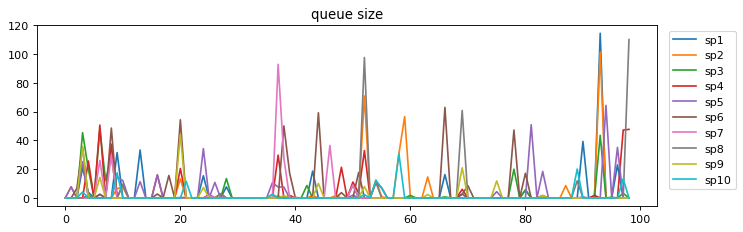

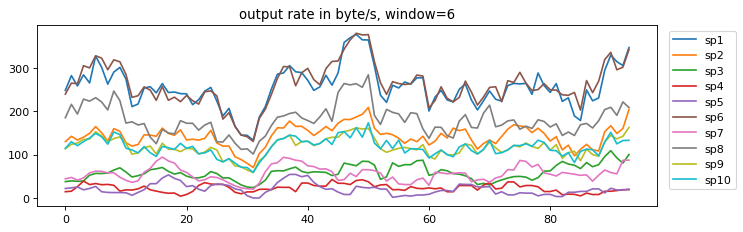

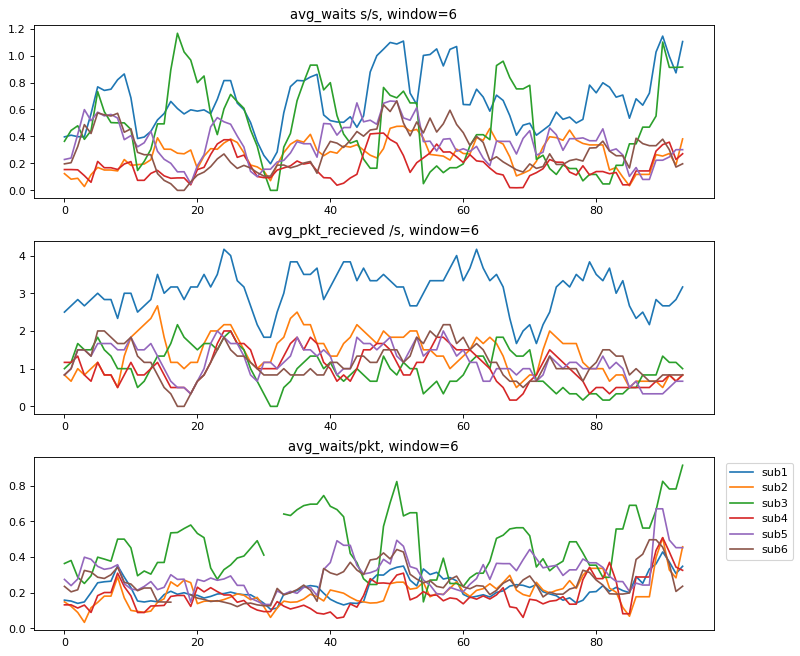

In [8]:
# plot
net.visualize()
plt.figure(figsize=(10, 3), dpi=80)
#monitor.queue_size
#monitor.queue_length
avg_queue_size = np.zeros(100)
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    plt.plot(monitor.queue_size, label=monitor.port.sp_id)
plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("queue size")
window = 6
plt.figure(figsize=(10, 3), dpi=80)
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    a = np.array(monitor.bytes_sent)
    b = np.array([0]*window+monitor.bytes_sent[0:-window])
    plt.plot((a-b)[window-1:]/window/monitor_rate, label=monitor.port.sp_id)
plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("output rate in byte/s, window="+str(window))
import warnings
warnings.filterwarnings('ignore')
window = 6
plt.figure(figsize=(10, 9), dpi=80)

for i in range(len(net.sub_monitor_list)):
    monitor = net.sub_monitor_list[i]
    a = np.array(monitor.packets_rec)
    b = np.array([0]*window+monitor.packets_rec[0:-window])
    avg_packet_rec_per_time = (a-b)[window-1:]/window/monitor_rate
    
    a = np.array(monitor.tot_waits)
    b = np.array([0]*window+monitor.tot_waits[0:-window])
    avg_waits_per_time = (a-b)[window-1:]/window/monitor_rate
    

    plt.subplot(311)
    plt.plot(avg_waits_per_time, label=monitor.client.client_id)
    plt.subplot(312)
    plt.plot(avg_packet_rec_per_time, label=monitor.client.client_id)
    plt.subplot(313)
    plt.plot(avg_waits_per_time/avg_packet_rec_per_time, label=monitor.client.client_id)

plt.subplot(311)
plt.title("avg_waits s/s, window="+str(window))
plt.subplot(312)
plt.title("avg_pkt_recieved /s, window="+str(window))
plt.subplot(313)
plt.title("avg_waits/pkt, window="+str(window))
plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)

In [9]:
net.edge_set

[(3, 6), (4, 9), (5, 10), (7, 6), (6, 1), (9, 1), (1, 2), (2, 8), (8, 10)]

In [4]:
tree = tp.TopicTree()

In [16]:
tree.add_branch("a1/b1/c1")
tree.add_branch("a1/*/c1")
tree.add_branch("a1/#")

0.01

In [17]:
tree.visualize()

root: []
   |__a1: []
      |__b1: []
         |__c1: []
      |__*: []
         |__c1: []
      |__#: []


In [18]:
node_list, delay = tree.match_branch("a1/*/c1")
for node in node_list:
    node.visualize()

TopicNode: root --> a1 --> # []
TopicNode: root --> a1 --> * --> c1 []


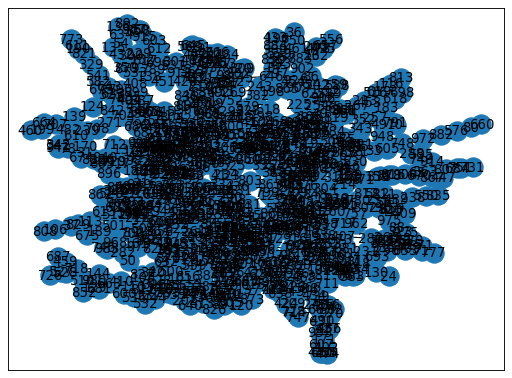

In [6]:
edges = tc.get_edges(1000, seed=1)
G = nx.Graph()
broker_nodes = []
for i in range(1000):
    broker_nodes.append((i+1, {"node_color": "blue"}))
    
G.add_nodes_from(broker_nodes)

broker_connections = []
for id1, id2 in edges:
    broker_connections.append((id1, id2))
G.add_edges_from(broker_connections)    

plt.figure(figsize=(8, 6), dpi=80)

nx.draw_networkx(G)
plt.show()

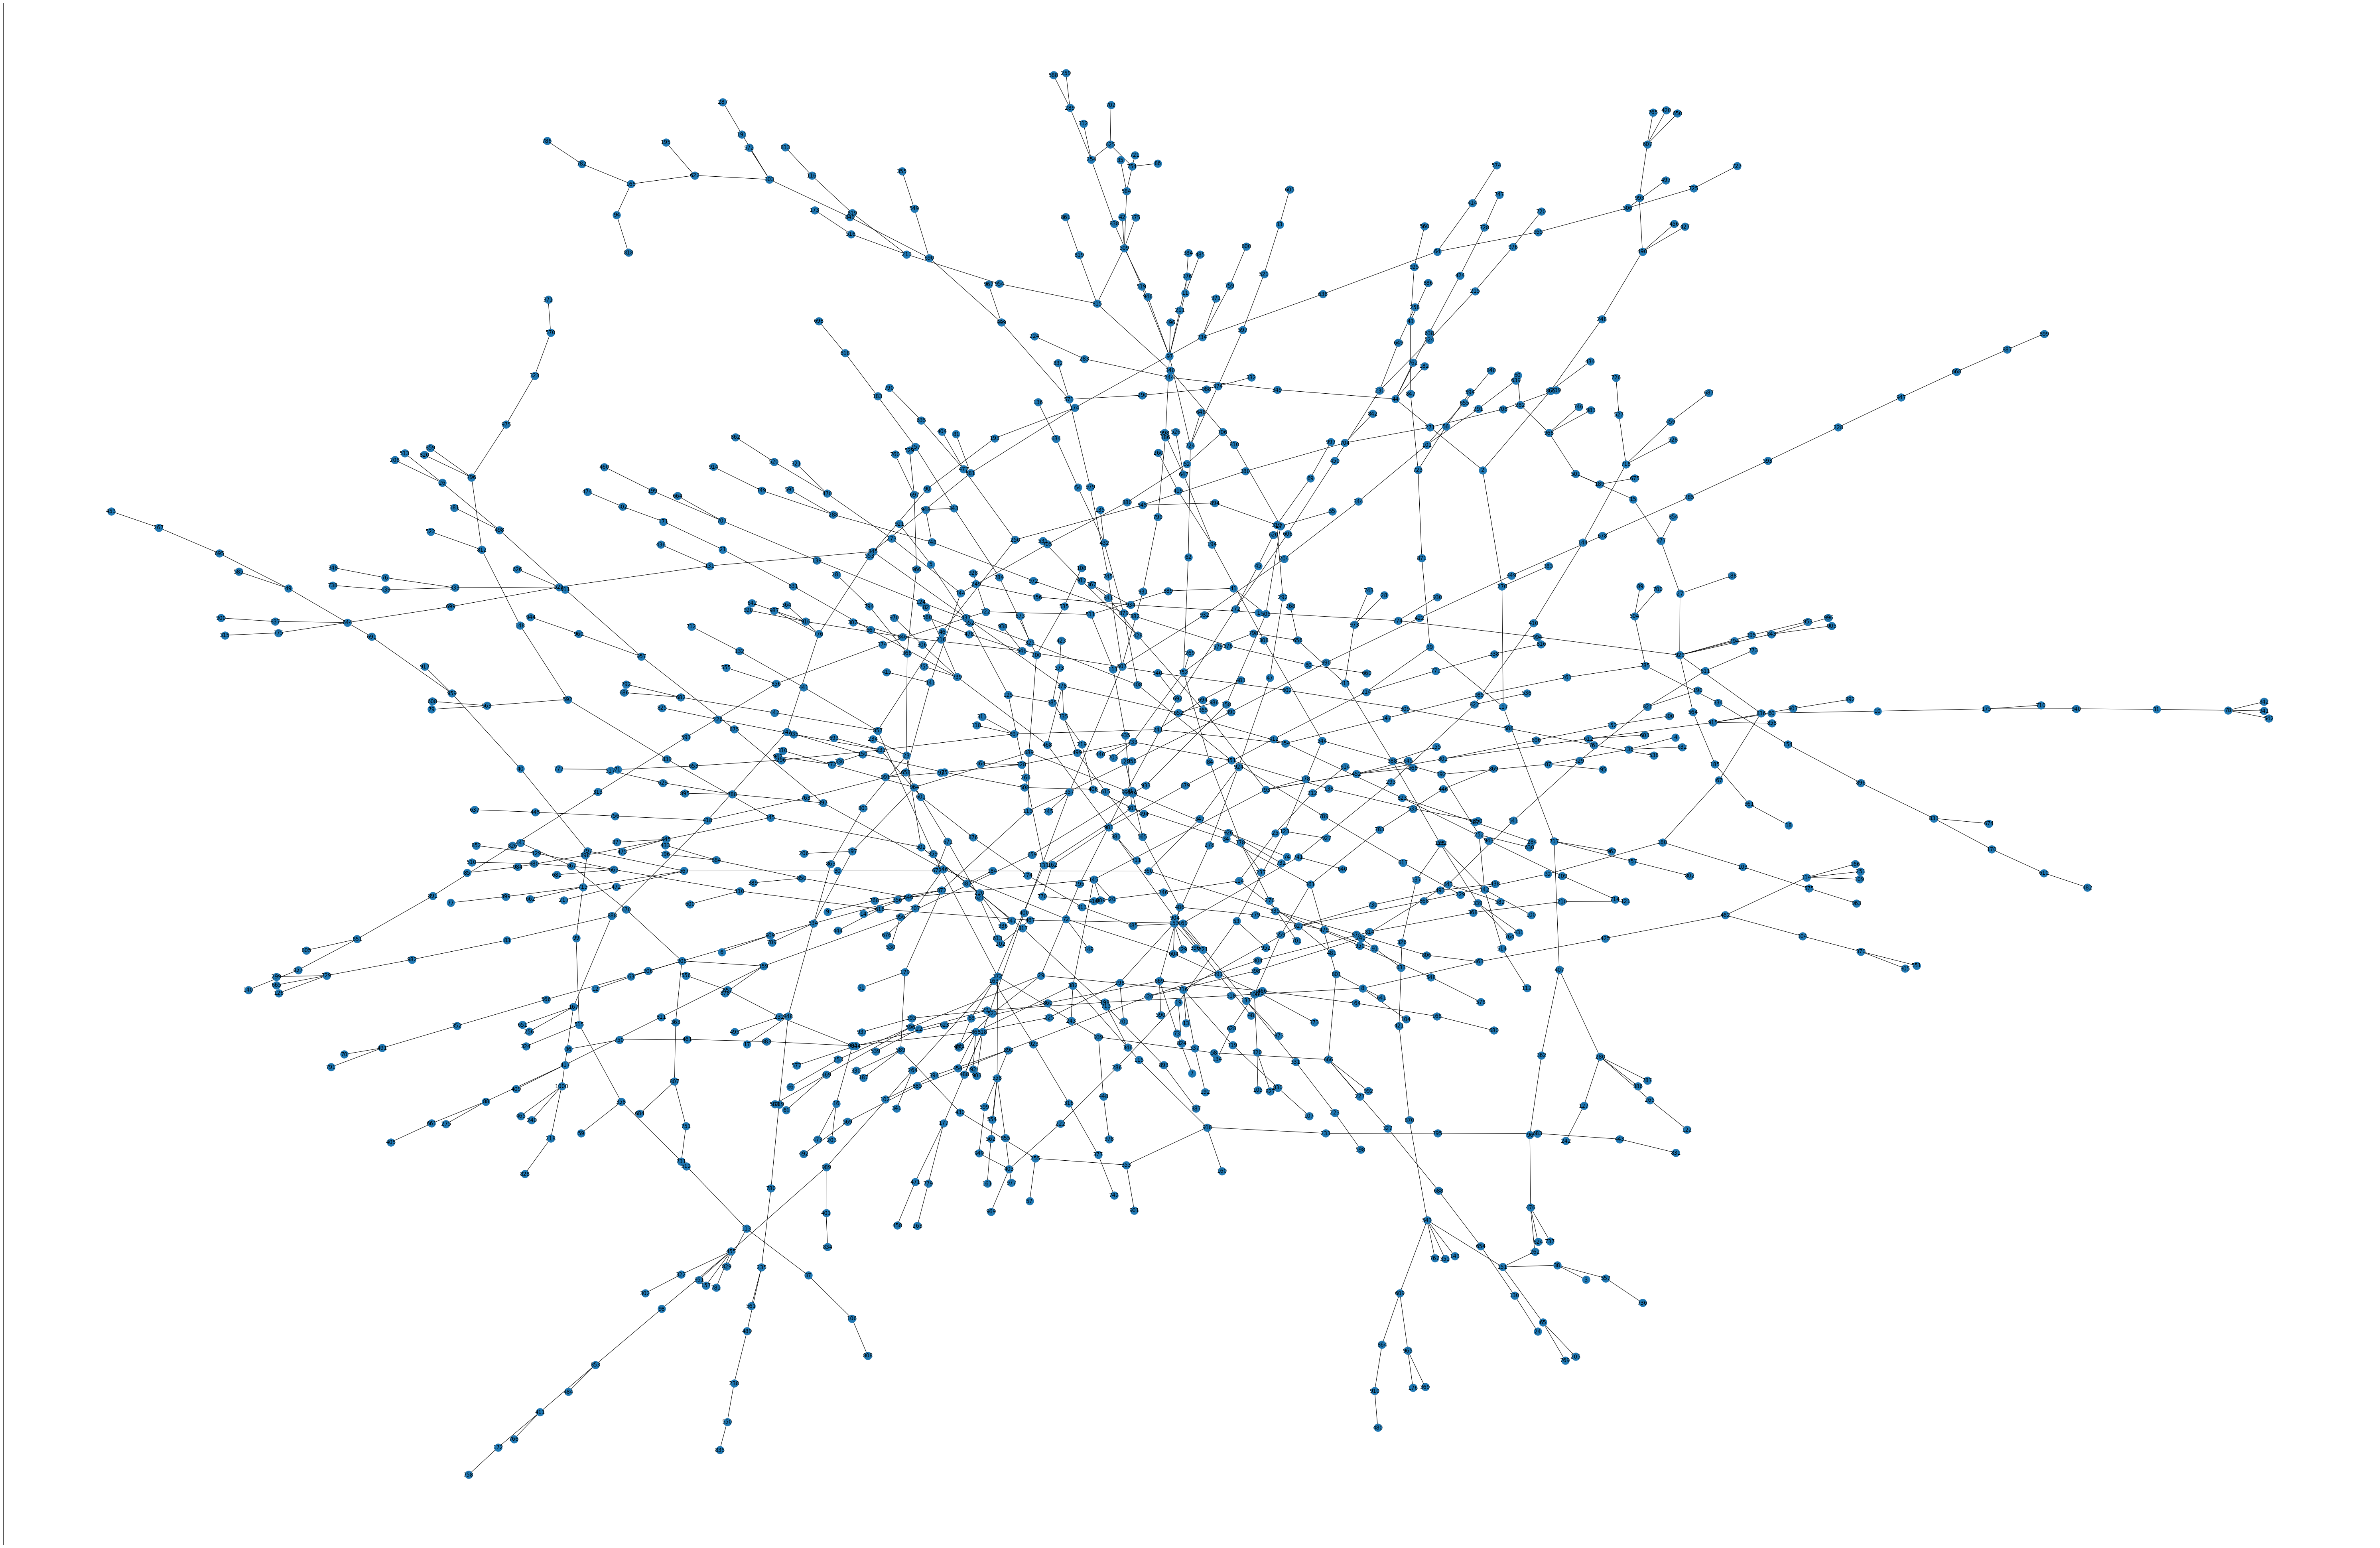

In [10]:
plt.figure(figsize=(96, 64), dpi=80)

nx.draw_networkx(G)
plt.show()